In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs  # Import Latin Hypercube Sampling function

class drop_wave_wolf:
    
    def __init__(self, num_wolves, num_dimensions, num_iterations, lower_bound, upper_bound, objective_function):
        self.num_wolves = num_wolves  # Number of grey wolves in the pack
        self.num_dimensions = num_dimensions  # Number of dimensions in the problem
        self.num_iterations = num_iterations  # Number of iterations or epochs
        self.lower_bound = lower_bound  # Lower bound of the search space
        self.upper_bound = upper_bound  # Upper bound of the search space
        self.objective_function = objective_function  # Objective function to be optimized
        self.best_objective_values = []
    
    
    # Initialize wolves
    def initialize_wolves(self, init_type='random'):
        if init_type == 'random':
            return np.random.uniform(self.lower_bound, self.upper_bound, size=(self.num_wolves, self.num_dimensions))
        elif init_type == 'lhs':
            lhs_samples = lhs(self.num_dimensions, samples=self.num_wolves)
            return self.lower_bound + lhs_samples * (self.upper_bound - self.lower_bound)
        else:
            raise ValueError("Invalid initialization type. Use 'random' or 'lhs'.")

    # Update alpha, beta, delta wolf  
    def update_alpha(self, iteration):
        a = 2 - iteration * (2 / self.num_iterations)  # Calculate value of 'a'
        return 2 * a * np.random.random_sample(self.num_dimensions) - a

    def update_beta(self, iteration):
        b = 1 - iteration * (1 / self.num_iterations)  # Calculate value of 'b'
        return 2 * b * np.random.random_sample(self.num_dimensions) - b

    def update_delta(self, iteration):
        d = iteration * (1 / self.num_iterations)  # Calculate value of 'd'
        return 2 * d * np.random.random_sample(self.num_dimensions) - d
    

    # Update wolf to get the best 
    def update_wolves(self, wolves, alpha, beta, delta):
        updated_wolves = np.zeros_like(wolves)
        for i in range(self.num_wolves):
            r1 = np.random.random_sample(self.num_dimensions)
            r2 = np.random.random_sample(self.num_dimensions)
            A1 = 2 * r1 * alpha - alpha
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha - wolves[i])
            X1 = alpha - A1 * D_alpha

            r1 = np.random.random_sample(self.num_dimensions)
            r2 = np.random.random_sample(self.num_dimensions)
            A2 = 2 * r1 * beta - beta
            C2 = 2 * r2
            D_beta = np.abs(C2 * beta - wolves[i])
            X2 = beta - A2 * D_beta

            r1 = np.random.random_sample(self.num_dimensions)
            r2 = np.random.random_sample(self.num_dimensions)
            A3 = 2 * r1 * delta - delta
            C3 = 2 * r2
            D_delta = np.abs(C3 * delta - wolves[i])
            X3 = delta - A3 * D_delta

            updated_wolves[i] = (X1 + X2 + X3) / 3
        return updated_wolves
    

    # Optimization 
    def optimize(self, init_type='random'):
        wolves = self.initialize_wolves(init_type)
        best_objective_value = float('inf')
        
        for iteration in range(self.num_iterations):
            alpha = self.update_alpha(iteration)
            beta = self.update_beta(iteration)
            delta = self.update_delta(iteration)
            wolves = self.update_wolves(wolves, alpha, beta, delta)
            objective_values = [self.objective_function(wolf) for wolf in wolves]
            min_objective_value = min(objective_values)
            if min_objective_value < best_objective_value:
                best_objective_value = min_objective_value
            self.best_objective_values.append(best_objective_value)
        plot = True
        if plot:
            plt.plot(self.best_objective_values)
            plt.title("Convergence Curve")
            plt.xlabel("Iteration")
            plt.ylabel("Fitness")
            plt.show()
        best_wolf = wolves[np.argmin(objective_values)]
        
        return best_wolf


def drop(xx):
    x1 = xx[0]
    x2 = xx[1]

    frac1 = 1 + np.cos(12 * np.sqrt(x1 ** 2 + x2 ** 2))
    frac2 = 0.5 * (x1 ** 2 + x2 ** 2) + 2

    y = -frac1 / frac2
    return y


 

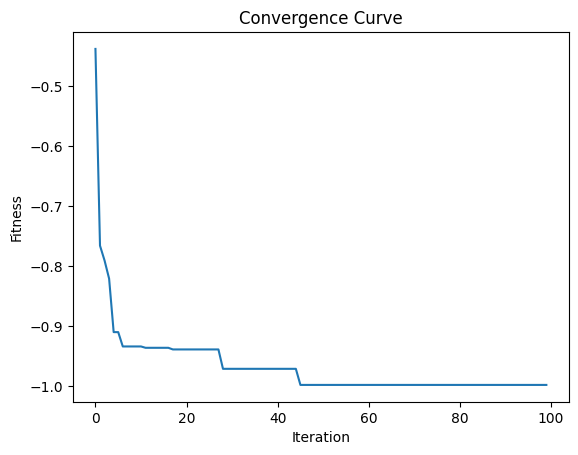

Best solution found with random initialization: [-0.08727664  0.00032051]
Objective value at best solution (random): -0.7485186486374172


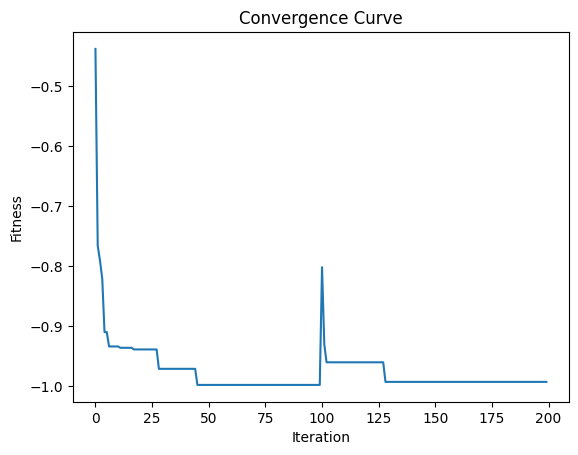

Best solution found with Latin Hypercube Sampling initialization: [0.10142788 0.11742171]
Objective value at best solution (LHS): -0.3543372055538241


In [2]:
# Initialize drop_wave_wolf
num_wolves = 10
num_dimensions = 2
num_iterations = 100
lower_bound = -5
upper_bound = 12

gwo = drop_wave_wolf(num_wolves, num_dimensions, num_iterations, lower_bound, upper_bound, drop)

# Optimize the function with random initialization
best_solution_random = gwo.optimize(init_type='random')
print("Best solution found with random initialization:", best_solution_random)
print("Objective value at best solution (random):", drop(best_solution_random))

# Optimize the function with Latin Hypercube Sampling initialization
best_solution_lhs = gwo.optimize(init_type='lhs')
print("Best solution found with Latin Hypercube Sampling initialization:", best_solution_lhs)
print("Objective value at best solution (LHS):", drop(best_solution_lhs))
